<a href="https://colab.research.google.com/github/TheKaashymawo/2018-FIFA-World-Cup---RUSSIA/blob/main/2018_FIFA_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
!pip install chart-studio
import chart_studio.plotly as py
# import plotly.plotly as py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 659.3 kB/s eta 0:00:00


#1. Data Preparation

##1.1 Load Dataset

In [2]:
FIFA2018 = pd.read_csv('/content/drive/MyDrive/Projects/2018 FIFA World Cup Dataset/CompleteDataset.csv', low_memory=False)
FIFA2018.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

`Let us select the most compelling columns from the dataset and generate insights`

In [3]:
compelling_columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Club',
    'Value',
    'Wage',
    'Preferred Positions'
]
FIFA2018 = pd.DataFrame(FIFA2018, columns=compelling_columns)

##1.2 Data Summary

`Then, we take a look at the first 5 observations of the dataframe`

In [4]:
FIFA2018.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [5]:
FIFA2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 17981 non-null  object
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17733 non-null  object
 6   Value                17981 non-null  object
 7   Wage                 17981 non-null  object
 8   Preferred Positions  17981 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


`Apparently, calculations cannot be done on the Value and Wage columns because the datatype is an object. Hence, both columns datatype needs to be converted to integer`

In [6]:
# define a function to convert the object datatype to integer, so calculations
# can be done on the columns

def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

# create new columns for the Value and Wage columns that needs to be converted to integer datatype
FIFA2018['ValueInt'] = FIFA2018['Value'].apply(lambda x: str2number(x))
FIFA2018['WageInt'] = FIFA2018['Wage'].apply(lambda x: str2number(x))

`Let us print information about the DataFrame. This information contains the number of columns, column labels, column data types, memory usage, and the number of cells in each column (non-null values).`

In [7]:
FIFA2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Nationality          17981 non-null  object 
 3   Overall              17981 non-null  int64  
 4   Potential            17981 non-null  int64  
 5   Club                 17733 non-null  object 
 6   Value                17981 non-null  object 
 7   Wage                 17981 non-null  object 
 8   Preferred Positions  17981 non-null  object 
 9   ValueInt             17981 non-null  float64
 10  WageInt              17981 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


`Also, from the 'Preferred Positions' column, we can see that some footballers are having more than one position, so I will select the first position and ignore the rest.`

In [8]:
FIFA2018['Position'] = FIFA2018['Preferred Positions'].str.split().str[0]
FIFA2018.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueInt,WageInt,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,LW


#2. Exploratory Data Analysis

## 2.1 Age

<ipython-input-11-7ac6cae669af>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




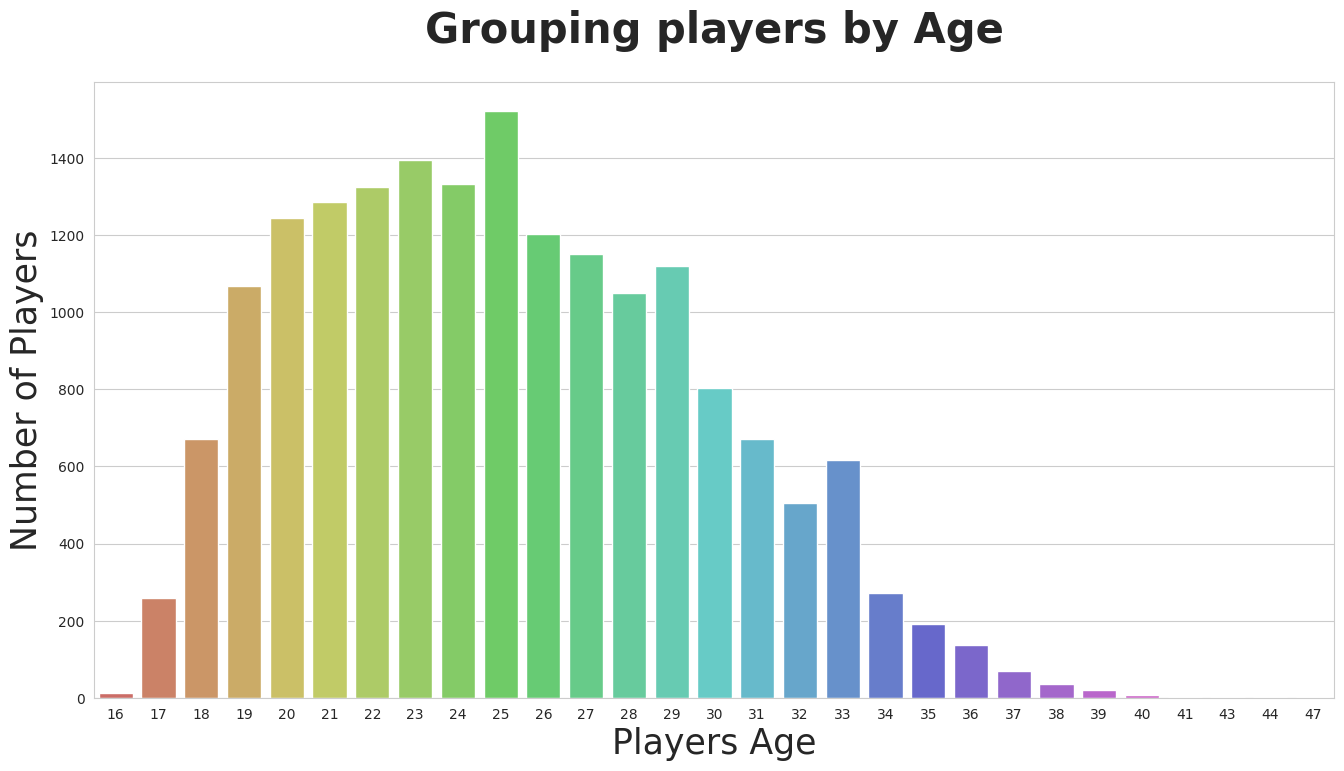

In [11]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Players Age', fontsize=25)
plt.ylabel('Number of Players', fontsize=25)
sns.countplot(x="Age", data=FIFA2018, palette="hls");
plt.show()

## 2.2 Overall

<ipython-input-12-d89697b92aba>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




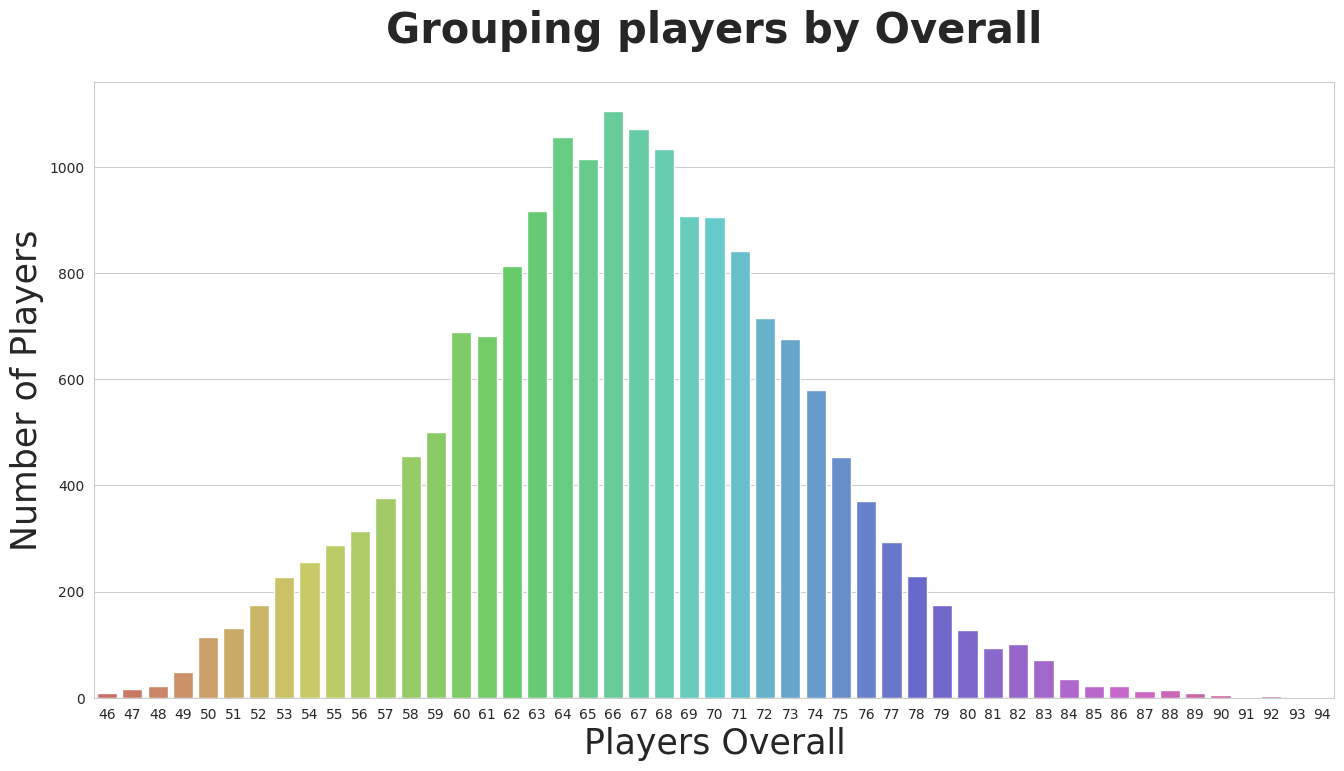

In [12]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Players Overall', fontsize=25)
plt.ylabel('Number of Players', fontsize=25)
sns.countplot(x="Overall", data=FIFA2018, palette="hls");
plt.show()

## 2.3 Preferred Position

<ipython-input-13-0adcbe90a060>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




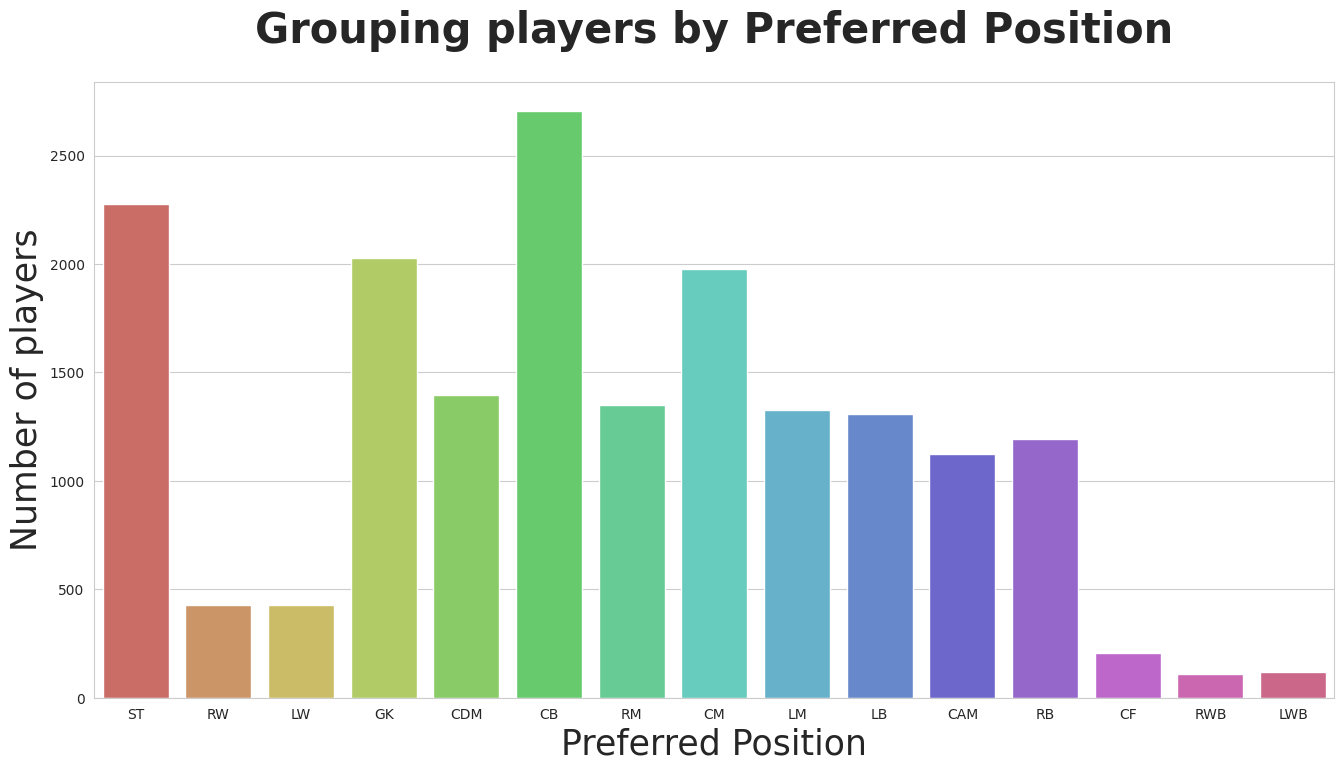

In [13]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Preferred Position', fontsize=25)
plt.ylabel('Number of players', fontsize=25)
sns.countplot(x="Position", data=FIFA2018, palette="hls");
plt.show()

## 2.4 Players Value

`Let's see the Top 20 Players with highest value`

In [14]:
sorted_players = FIFA2018.sort_values(["ValueInt"], ascending=False).head(20)
sorted_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueInt,WageInt,Position
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,RW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,ST
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,ST,92000000.0,355000.0,ST
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,LW,90500000.0,295000.0,LW
11,K. De Bruyne,26,Belgium,89,92,Manchester City,€83M,€285K,RM CM CAM,83000000.0,285000.0,RM
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,CDM CM,79000000.0,340000.0,CDM
19,P. Dybala,23,Argentina,88,93,Juventus,€79M,€215K,ST CAM,79000000.0,215000.0,ST
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,ST,77000000.0,275000.0,ST


`Let us drop some columns and retain only the Name, Age, Nationality, Club, Position and Value columns`

In [15]:
Top20players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]]
Top20players

,Name,Age,Nationality,Club,Position,Value
2,Neymar,25,Brazil,Paris Saint-Germain,LW,€123M
1,L. Messi,30,Argentina,FC Barcelona,RW,€105M
3,L. Suárez,30,Uruguay,FC Barcelona,ST,€97M
0,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€95.5M
5,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€92M
7,E. Hazard,26,Belgium,Chelsea,LW,€90.5M
11,K. De Bruyne,26,Belgium,Manchester City,RM,€83M
8,T. Kroos,27,Germany,Real Madrid CF,CDM,€79M
19,P. Dybala,23,Argentina,Juventus,ST,€79M
9,G. Higuaín,29,Argentina,Juventus,ST,€77M


`Let's create a scatter plot to visualize the players' Value in relation to their Age and Overall rating:`

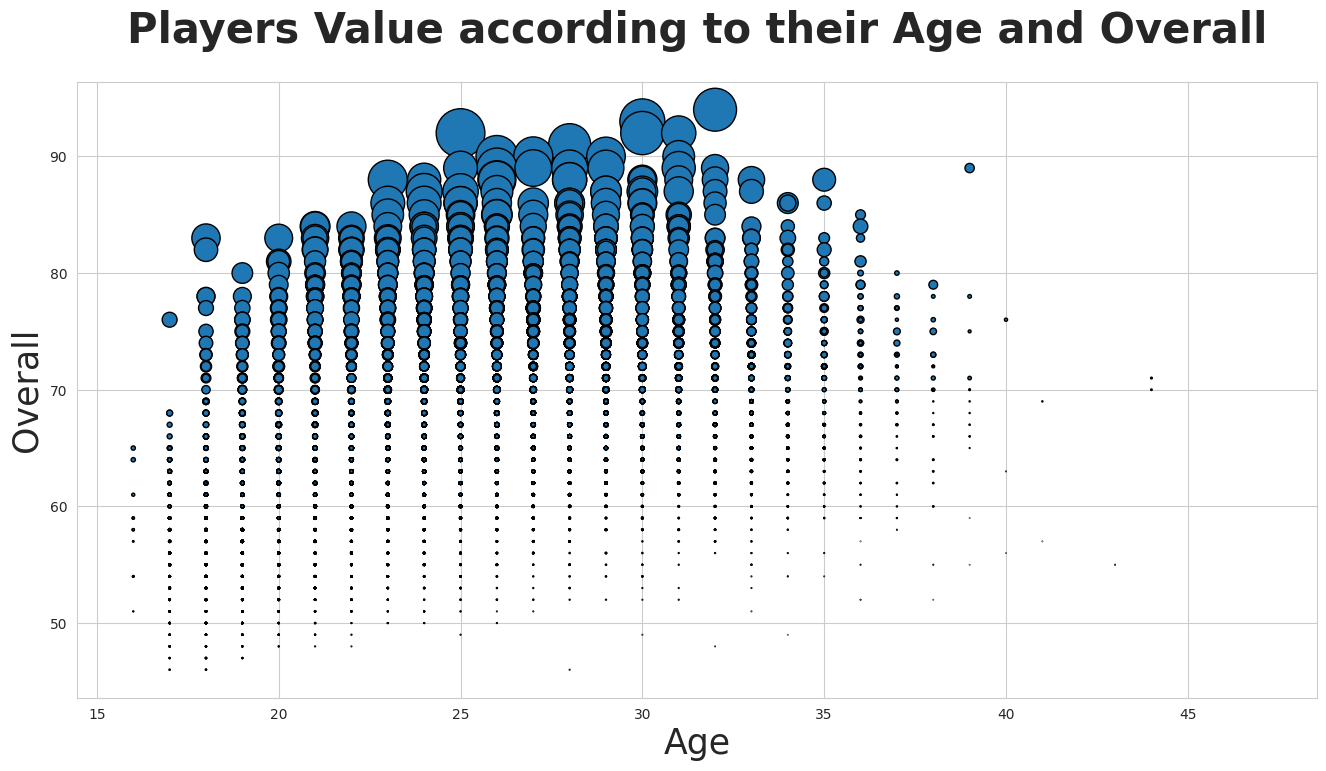

In [16]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA2018["Age"].values
overall = FIFA2018["Overall"].values
value = FIFA2018["ValueInt"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

## 2.5 Players' Wage

`Let's see the Top 20 Players with highest Wage`

In [17]:
sorted_players = FIFA2018.sort_values(["WageInt"], ascending=False).head(20)
sorted_players

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueInt,WageInt,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,RW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,ST
15,G. Bale,27,Wales,89,89,Real Madrid CF,€69.5M,€370K,RW,69500000.0,370000.0,RW
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,ST,92000000.0,355000.0,ST
14,L. Modrić,31,Croatia,89,89,Real Madrid CF,€57M,€340K,CDM CM,57000000.0,340000.0,CDM
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,CDM CM,79000000.0,340000.0,CDM
16,S. Agüero,29,Argentina,89,89,Manchester City,€66.5M,€325K,ST,66500000.0,325000.0,ST
10,Sergio Ramos,31,Spain,90,90,Real Madrid CF,€52M,€310K,CB,52000000.0,310000.0,CB
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,LW,90500000.0,295000.0,LW


`Let us drop some columns and retain only the Name, Age, Nationality, Club, Position and Value columns`

In [18]:
Top20players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]]
Top20players

,Name,Age,Nationality,Club,Position,Value
0,Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€95.5M
1,L. Messi,30,Argentina,FC Barcelona,RW,€105M
3,L. Suárez,30,Uruguay,FC Barcelona,ST,€97M
15,G. Bale,27,Wales,Real Madrid CF,RW,€69.5M
5,R. Lewandowski,28,Poland,FC Bayern Munich,ST,€92M
14,L. Modrić,31,Croatia,Real Madrid CF,CDM,€57M
8,T. Kroos,27,Germany,Real Madrid CF,CDM,€79M
16,S. Agüero,29,Argentina,Manchester City,ST,€66.5M
10,Sergio Ramos,31,Spain,Real Madrid CF,CB,€52M
7,E. Hazard,26,Belgium,Chelsea,LW,€90.5M


`Let's create a scatter plot to visualize the players' Wage in relation to their Age and Overall rating:`

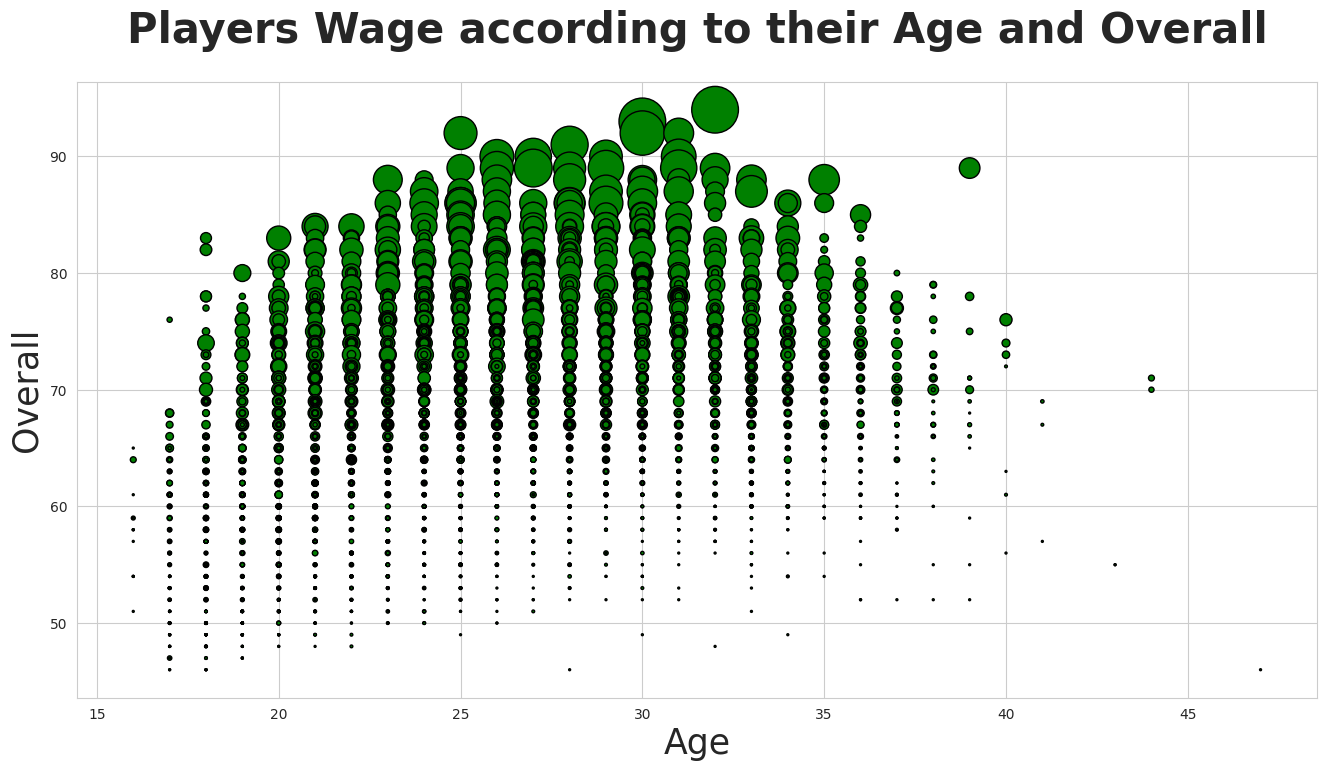

In [19]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA2018["Age"].values
overall = FIFA2018["Overall"].values
value = FIFA2018["WageInt"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="green")
plt.show()

## 2.6 Best Squad Analysis

### 2.6.1 The Squad of Highest Overall Players

`For simplicity, I will pull in data that are only vital to this analysis:`

In [20]:
FIFA18 = FIFA2018[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA2018.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,ValueInt,WageInt,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,95500000.0,565000.0,ST
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,105000000.0,565000.0,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,123000000.0,280000.0,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,97000000.0,510000.0,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,61000000.0,230000.0,GK
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,ST,92000000.0,355000.0,ST
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,GK,64500000.0,215000.0,GK
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,LW,90500000.0,295000.0,LW
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,CDM CM,79000000.0,340000.0,CDM
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,ST,77000000.0,275000.0,ST


`Let us get the best squad according to FIFA 18 purely based on overall rating!`

In [21]:
def get_best_squad(formation):
    FIFA2018_copy = FIFA2018.copy()
    store = []

    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].max(),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])

        FIFA2018_copy.drop(FIFA2018_copy[FIFA2018_copy['Position'] == i]['Overall'].idxmax(),
                         inplace = True)

    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7),
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [22]:
# Let us set up the 4-3-3 squad
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position            Player Overall Age                Club  Value  Wage
      GK          M. Neuer      92  31    FC Bayern Munich   €61M €230K
      RB          Carvajal      84  25      Real Madrid CF   €32M €195K
      CB      Sergio Ramos      90  31      Real Madrid CF   €52M €310K
      CB      G. Chiellini      89  32            Juventus   €38M €225K
      LB           Marcelo      87  29      Real Madrid CF   €38M €250K
     CDM          T. Kroos      90  27      Real Madrid CF   €79M €340K
      CM          N. Kanté      87  26             Chelsea €52.5M €190K
     CAM          Coutinho      86  25           Liverpool   €56M €205K
      RW          L. Messi      93  30        FC Barcelona  €105M €565K
      ST Cristiano Ronaldo      94  32      Real Madrid CF €95.5M €565K
      LW            Neymar      92  25 Paris Saint-Germain  €123M €280K


In [23]:
# Let us set up the 4-4-2 squad
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position            Player Overall Age              Club  Value  Wage
      GK          M. Neuer      92  31  FC Bayern Munich   €61M €230K
      RB          Carvajal      84  25    Real Madrid CF   €32M €195K
      CB      Sergio Ramos      90  31    Real Madrid CF   €52M €310K
      CB      G. Chiellini      89  32          Juventus   €38M €225K
      LB           Marcelo      87  29    Real Madrid CF   €38M €250K
      RM      K. De Bruyne      89  26   Manchester City   €83M €285K
      CM          N. Kanté      87  26           Chelsea €52.5M €190K
      CM          A. Vidal      87  30  FC Bayern Munich €37.5M €160K
      LM        C. Eriksen      87  25 Tottenham Hotspur   €65M €165K
      ST Cristiano Ronaldo      94  32    Real Madrid CF €95.5M €565K
      ST         L. Suárez      92  30      FC Barcelona   €97M €510K


In [24]:
# Let us set up the 4-2-3-1 squad
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position            Player Overall Age             Club  Value  Wage
      GK          M. Neuer      92  31 FC Bayern Munich   €61M €230K
      RB          Carvajal      84  25   Real Madrid CF   €32M €195K
      CB      Sergio Ramos      90  31   Real Madrid CF   €52M €310K
      CB      G. Chiellini      89  32         Juventus   €38M €225K
      LB           Marcelo      87  29   Real Madrid CF   €38M €250K
     CDM          T. Kroos      90  27   Real Madrid CF   €79M €340K
     CDM         L. Modrić      89  31   Real Madrid CF   €57M €340K
     CAM          Coutinho      86  25        Liverpool   €56M €205K
     CAM     R. Nainggolan      86  29             Roma €42.5M €130K
     CAM     Cesc Fàbregas      86  30          Chelsea   €41M €210K
      ST Cristiano Ronaldo      94  32   Real Madrid CF €95.5M €565K


`Alright, now let's move onto studying different squad's impact on Nationality teams. First let's modifiy above get_summary and get_best_squad functions for Nationality:`

In [25]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA2018_copy = FIFA2018.copy()
    FIFA2018_copy = FIFA2018_copy[FIFA2018_copy['Nationality'] == nationality]
    store = []

    for i in formation:
        store.append([
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False),
            FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].max(),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA2018_copy.loc[[FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])

        FIFA2018_copy.drop(FIFA2018_copy[FIFA2018_copy['Position'].str.contains(i)][measurement].idxmax(),
                         inplace = True)

    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7),
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [26]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:

            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')

            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')

            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])
            count += 1

    return summary

`Also let's make our squad choices more strict:`

In [27]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [28]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

### 2.6 (A) France

`Let's explore different squad possibility of France and how it affects the ratings:`

In [29]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

               Squad  Overall  Potential
Nationality                             
France         3-4-3    84.55      89.55
France         4-4-2    84.00      89.91
France       4-3-1-2    84.55      89.64
France         4-3-3    84.64      89.91
France       4-2-3-1    84.55      89.91


`So we can say that France has the best squard as 4-3-3 for the current squad; and 4-4-2, 4-3-3, and 4-2-3-1 for the future squad based on team ratings. Let's check out the best 11 squad line-up of France in 4-3-3 for current rating as well as 4-4-2 for potential rating:`

In [30]:
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.6
Position       Player Overall Age                    Club  Value  Wage
      GK    H. Lloris      88  30       Tottenham Hotspur   €38M €165K
      RB     K. Zouma      79  22              Stoke City   €15M  €96K
      CB    R. Varane      85  24          Real Madrid CF €46.5M €175K
      CB   A. Laporte      84  23 Athletic Club de Bilbao €35.5M  €36K
      LB   L. Kurzawa      80  24     Paris Saint-Germain €16.5M  €69K
      CM     N. Kanté      87  26                 Chelsea €52.5M €190K
     CDM     P. Pogba      87  24       Manchester United €66.5M €195K
      CM   B. Matuidi      85  30                Juventus €28.5M €145K
      RM   F. Thauvin      82  24  Olympique de Marseille   €28M  €40K
      ST   K. Benzema      86  29          Real Madrid CF €44.5M €295K
      LW A. Griezmann      88  26         Atlético Madrid   €75M €150K


In [31]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

-Potential-
Average rating: 89.9
Position       Player Potential Age                    Club  Value  Wage
      GK    A. Lafont        89  18             Toulouse FC €11.5M  €10K
      RB     K. Zouma        86  22              Stoke City   €15M  €96K
      CB    R. Varane        92  24          Real Madrid CF €46.5M €175K
      CB   A. Laporte        89  23 Athletic Club de Bilbao €35.5M  €36K
      LB L. Hernández        88  21         Atlético Madrid €13.5M  €36K
      RM      A. Pléa        86  24                OGC Nice €20.5M  €41K
     CDM     P. Pogba        92  24       Manchester United €66.5M €195K
     CAM   O. Dembélé        92  20            FC Barcelona   €40M €150K
      LM     T. Lemar        91  21               AS Monaco €38.5M  €37K
      ST    K. Mbappé        94  18     Paris Saint-Germain €41.5M  €31K
      ST   A. Martial        90  21       Manchester United   €33M €115K


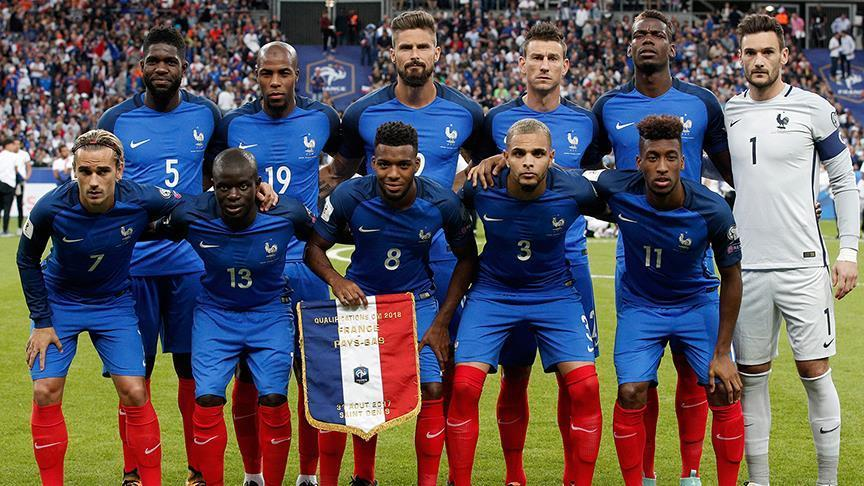

### 2.6 (B) Germany

`The holding champion is certainly a heavy candidate for this year's 1st place:`

In [32]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Overall', 'Potential']] = Germany[['Overall', 'Potential']].astype(float)

print (Germany)

               Squad  Overall  Potential
Nationality                             
Germany        3-4-3    86.27      88.55
Germany        4-4-2    85.09      88.36
Germany      4-3-1-2    85.36      88.00
Germany        4-3-3    86.27      88.55
Germany      4-2-3-1    86.09      88.55


`As we can see, Germany's current ratings peak with either 3-4-3 or 4-3-3 formation; while those 2 plus 4-2-3-1 are their best options for the future. With that, I'll show Germany's best 11 squad with 4-3-3 for current ratings and 4-2-3-1 for potential ratings.`

In [33]:
rating_433_GER_Overall, best_list_433_GER_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_GER_Overall))
print(best_list_433_GER_Overall)

-Overall-
Average rating: 86.3
Position      Player Overall Age              Club  Value  Wage
      GK    M. Neuer      92  31  FC Bayern Munich   €61M €230K
      RB  A. Rüdiger      82  24           Chelsea €24.5M €105K
      CB  J. Boateng      88  28  FC Bayern Munich   €48M €215K
      CB  M. Hummels      88  28  FC Bayern Munich   €48M €215K
      LB   J. Hector      80  27        1. FC Köln   €14M  €42K
     CDM    T. Kroos      90  27    Real Madrid CF   €79M €340K
     CDM I. Gündoğan      85  26   Manchester City   €46M €190K
     CDM  S. Khedira      84  30          Juventus   €29M €160K
      RW     M. Özil      88  28           Arsenal   €60M €265K
      ST   T. Müller      86  27  FC Bayern Munich €47.5M €190K
      LW     M. Reus      86  28 Borussia Dortmund   €45M €120K


In [34]:
rating_4231_GER_Potential, best_list_4231_GER_Potential = get_best_squad_n(squad_4231_strict, 'Germany', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_GER_Potential))
print(best_list_4231_GER_Potential)

-Potential-
Average rating: 88.5
Position      Player Potential Age                Club  Value  Wage
      GK    M. Neuer        92  31    FC Bayern Munich   €61M €230K
      RB  A. Rüdiger        86  24             Chelsea €24.5M €105K
      CB     N. Süle        89  21    FC Bayern Munich €30.5M  €78K
      CB  J. Boateng        88  28    FC Bayern Munich   €48M €215K
      LB B. Henrichs        86  20 Bayer 04 Leverkusen   €11M  €36K
     CDM    T. Kroos        90  27      Real Madrid CF   €79M €340K
     CDM L. Goretzka        88  22       FC Schalke 04   €30M  €46K
      RW     M. Özil        88  28             Arsenal   €60M €265K
     CAM   J. Brandt        88  21 Bayer 04 Leverkusen   €22M  €49K
      LM     L. Sané        91  21     Manchester City €34.5M €125K
      CF  K. Havertz        88  18 Bayer 04 Leverkusen    €8M  €25K


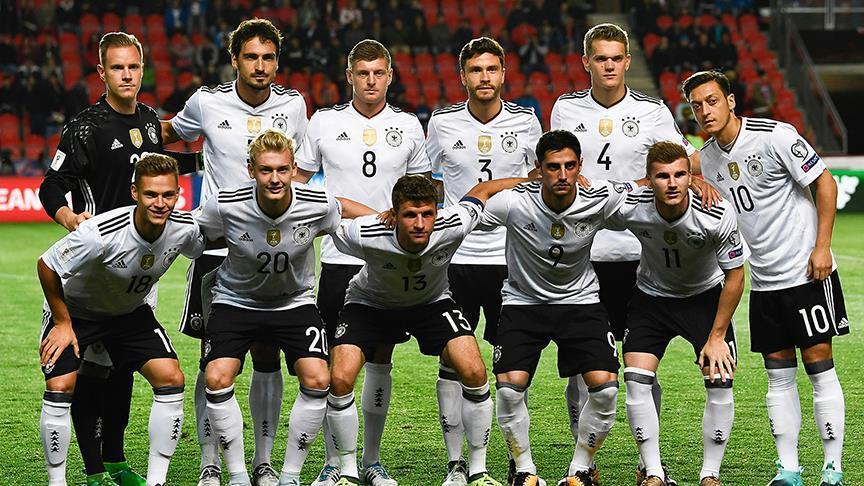

### 2.6 (C) Spain

`How about our 2010's winner? Uhn?`

In [35]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Overall', 'Potential']] = Spain[['Overall', 'Potential']].astype(float)

print (Spain)

               Squad  Overall  Potential
Nationality                             
Spain          3-4-3    86.27      88.82
Spain          4-4-2    86.45      88.73
Spain        4-3-1-2    86.55      88.09
Spain          4-3-3    86.64      89.00
Spain        4-2-3-1    86.64      89.00


`Well, Spain does best with either 4-3-3 or 4-2-3-1 for both current and potential rating. I'll choose 4-2-3-1 for the current squad and 4-3-3 for the potential squad.`

In [36]:
rating_4231_ESP_Overall, best_list_4231_ESP_Overall = get_best_squad_n(squad_4231_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_ESP_Overall))
print(best_list_4231_ESP_Overall)

-Overall-
Average rating: 86.6
Position          Player Overall Age              Club  Value  Wage
      GK          De Gea      90  26 Manchester United €64.5M €215K
      RB        Carvajal      84  25    Real Madrid CF   €32M €195K
      CB    Sergio Ramos      90  31    Real Madrid CF   €52M €310K
      CB           Piqué      87  30      FC Barcelona €37.5M €240K
      LB      Jordi Alba      85  28      FC Barcelona €30.5M €215K
     CDM          Thiago      88  26  FC Bayern Munich €70.5M €225K
      CM Sergio Busquets      86  28      FC Barcelona   €36M €250K
      RM       Juan Mata      84  29 Manchester United €30.5M €195K
     CAM   Cesc Fàbregas      86  30           Chelsea   €41M €210K
      LM     David Silva      87  31   Manchester City   €44M €220K
      ST     Diego Costa      86  28           Chelsea   €46M €235K


In [37]:
rating_433_ESP_Potential, best_list_433_ESP_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ESP_Potential))
print(best_list_433_ESP_Potential)

-Potential-
Average rating: 89.0
Position          Player Potential Age              Club  Value  Wage
      GK          De Gea        92  26 Manchester United €64.5M €215K
      RB Héctor Bellerín        88  22           Arsenal   €21M  €91K
      CB    Sergio Ramos        90  31    Real Madrid CF   €52M €310K
      CB           Piqué        87  30      FC Barcelona €37.5M €240K
      LB     Azpilicueta        87  27           Chelsea €37.5M €160K
     CDM          Thiago        90  26  FC Bayern Munich €70.5M €225K
     CAM   Dani Ceballos        88  20    Real Madrid CF €16.5M €105K
     CDM  Diego Llorente        87  23     Real Sociedad   €16M  €29K
      RM            Saúl        90  22   Atlético Madrid   €32M  €59K
      ST          Morata        88  24           Chelsea   €41M €170K
      LW   Marco Asensio        92  21    Real Madrid CF   €46M €175K


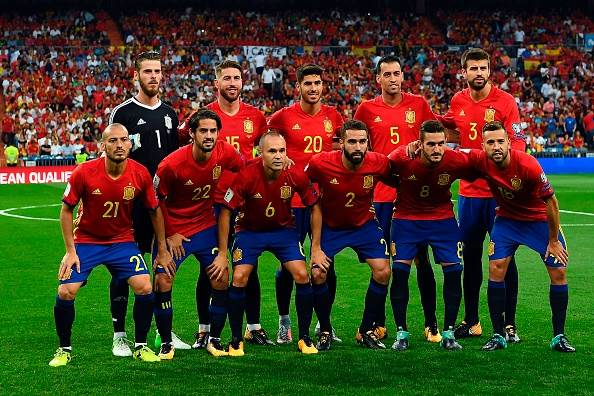

### 2.6 (D) Brazil

`Having won the World Cup the most times in history, the Samba team will no doubt be one of the top candidates for this summer in Russia.`

In [38]:
Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Brazil.set_index('Nationality', inplace = True)
Brazil[['Overall', 'Potential']] = Brazil[['Overall', 'Potential']].astype(float)

print (Brazil)

               Squad  Overall  Potential
Nationality                             
Brazil         3-4-3    85.36      88.45
Brazil         4-4-2    84.73      88.00
Brazil       4-3-1-2    84.64      88.00
Brazil         4-3-3    85.45      88.73
Brazil       4-2-3-1    85.36      88.73


`As you can see, Brazil has similar options like England. I'll go with 4-3-3 for the current rating and 4-2-3-1 for the potential rating.`

In [39]:
rating_433_BRA_Overall, best_list_433_BRA_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BRA_Overall))
print(best_list_433_BRA_Overall)

-Overall-
Average rating: 85.5
Position        Player Overall Age                Club  Value  Wage
      GK       Ederson      83  23     Manchester City   €26M  €87K
      RB    Dani Alves      84  34 Paris Saint-Germain    €9M €115K
      CB  Thiago Silva      88  32 Paris Saint-Germain   €34M €175K
      CB    David Luiz      86  30             Chelsea   €33M €190K
      LB       Marcelo      87  29      Real Madrid CF   €38M €250K
     CDM      Casemiro      85  25      Real Madrid CF   €42M €195K
     CAM      Coutinho      86  25           Liverpool   €56M €205K
     CAM       Willian      84  28             Chelsea €31.5M €200K
      RM Douglas Costa      82  26            Juventus   €24M €115K
      CF         Jonas      83  33          SL Benfica €16.5M  €21K
      LW        Neymar      92  25 Paris Saint-Germain  €123M €280K


In [40]:
rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

-Potential-
Average rating: 88.7
Position        Player Potential Age                  Club  Value  Wage
      GK       Ederson        89  23       Manchester City   €26M  €87K
      RB    Dani Alves        84  34   Paris Saint-Germain    €9M €115K
      CB    Marquinhos        89  23   Paris Saint-Germain €30.5M  €75K
      CB  Thiago Silva        88  32   Paris Saint-Germain   €34M €175K
      LB       Marcelo        87  29        Real Madrid CF   €38M €250K
     CDM      Casemiro        89  25        Real Madrid CF   €42M €195K
     CDM       Fabinho        88  23             AS Monaco €29.5M  €37K
      RM        Malcom        87  20 Girondins de Bordeaux €24.5M  €47K
     CAM      Coutinho        89  25             Liverpool   €56M €205K
      LW        Neymar        94  25   Paris Saint-Germain  €123M €280K
      ST Gabriel Jesus        92  20       Manchester City   €31M €115K


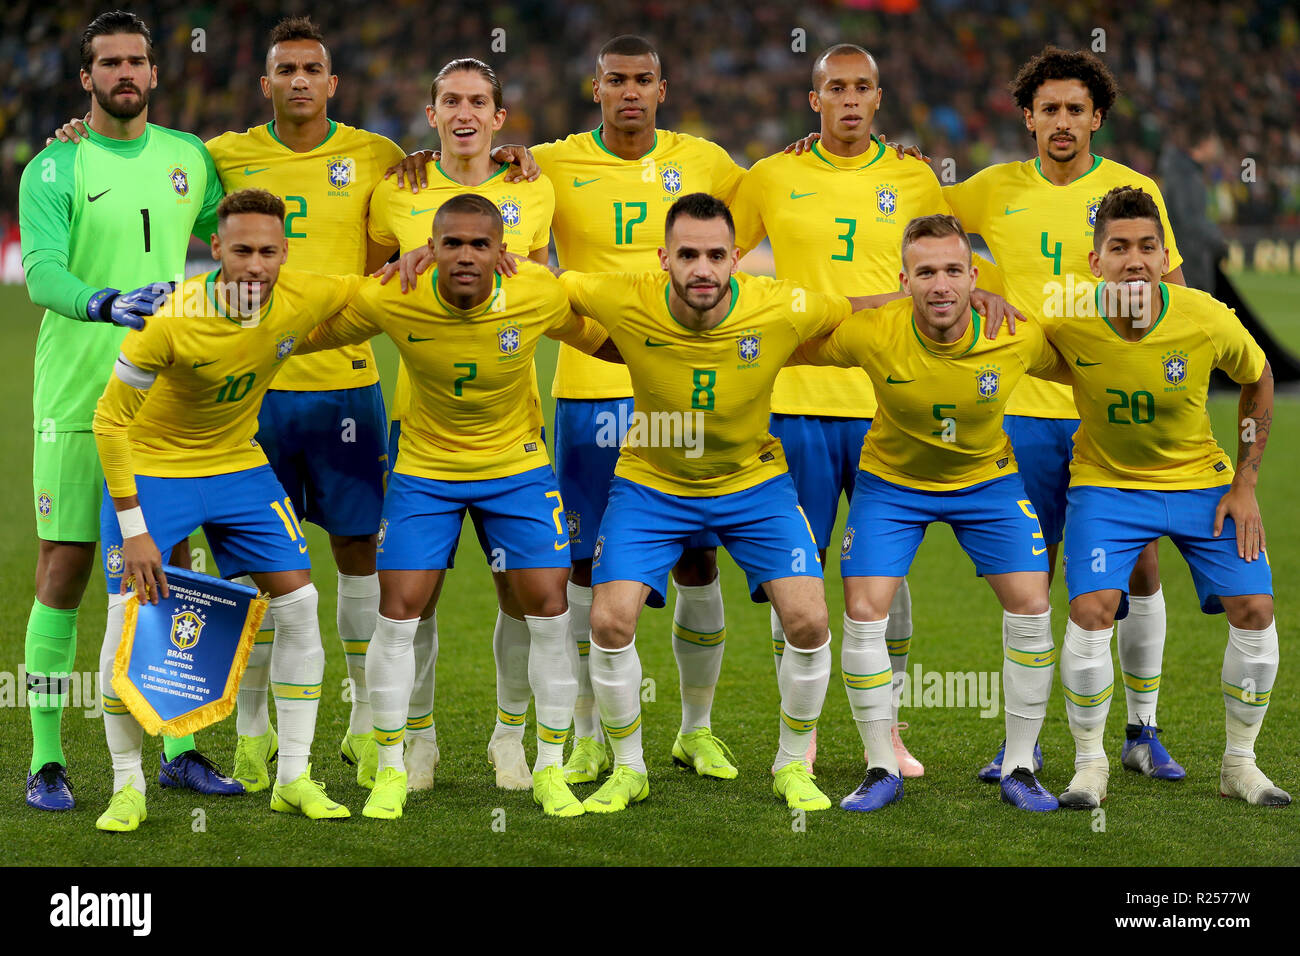

### 2.6 (E) Belgium

`The Red Devils has some of the best players in English Premier League, but can't never seem to make it far in the national level. Can Hazard and De Bruyne drive them far this time?`

In [41]:
Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Belgium.set_index('Nationality', inplace = True)
Belgium[['Overall', 'Potential']] = Belgium[['Overall', 'Potential']].astype(float)

print (Belgium)

               Squad  Overall  Potential
Nationality                             
Belgium        3-4-3    83.91      86.55
Belgium        4-4-2    83.36      86.73
Belgium      4-3-1-2    83.09      86.09
Belgium        4-3-3    84.27      87.27
Belgium      4-2-3-1    84.00      87.00


`Again, 4-3-3 is the best formation for Belgium's both current and future squad.`

In [42]:
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

-Overall-
Average rating: 84.3
Position          Player Overall Age              Club  Value  Wage
      GK     T. Courtois      89  25           Chelsea   €59M €190K
      RB        T. Foket      73  22          KAA Gent  €5.5M  €19K
      CB T. Alderweireld      86  28 Tottenham Hotspur €40.5M €165K
      CB   J. Vertonghen      85  30 Tottenham Hotspur €28.5M €130K
      LB    T. Vermaelen      78  31      FC Barcelona    €7M €120K
     CDM      M. Dembélé      83  29 Tottenham Hotspur   €25M €115K
     CAM   R. Nainggolan      86  29              Roma €42.5M €130K
     CAM       A. Witsel      82  28               NaN     €0    €0
      RM    K. De Bruyne      89  26   Manchester City   €83M €285K
      ST       R. Lukaku      86  24 Manchester United   €59M €210K
      LW       E. Hazard      90  26           Chelsea €90.5M €295K


In [43]:
rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

-Potential-
Average rating: 87.3
Position          Player Potential Age              Club  Value  Wage
      GK     T. Courtois        92  25           Chelsea   €59M €190K
      RB        T. Foket        79  22          KAA Gent  €5.5M  €19K
      CB T. Alderweireld        87  28 Tottenham Hotspur €40.5M €165K
      CB   L. Dendoncker        86  22    RSC Anderlecht   €15M  €25K
      LB       J. Lukaku        83  22             Lazio   €10M  €39K
      CM         D. Rigo        84  18               PSV  €1.3M   €3K
     CAM    Y. Tielemans        90  20         AS Monaco €23.5M  €35K
     CAM   R. Nainggolan        86  29              Roma €42.5M €130K
      RM    K. De Bruyne        92  26   Manchester City   €83M €285K
      ST       R. Lukaku        90  24 Manchester United   €59M €210K
      LW       E. Hazard        91  26           Chelsea €90.5M €295K


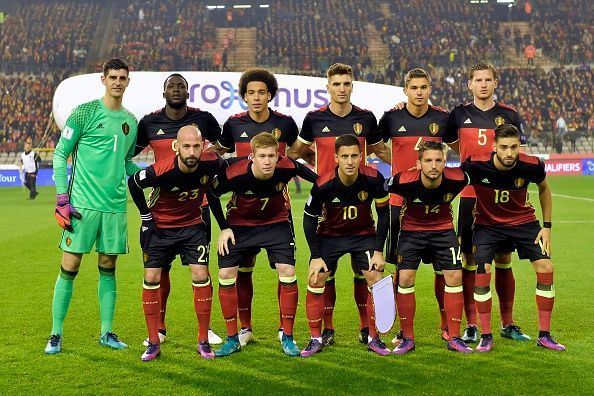

### 2.6 (F) Portugal

`The winner of Euro 2016 and the best player in the world 3 times in a row, Cristiano Ronaldo, has a real chance in this tournament as well.`

In [44]:
Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Portugal.set_index('Nationality', inplace = True)
Portugal[['Overall', 'Potential']] = Portugal[['Overall', 'Potential']].astype(float)

print (Portugal)

               Squad  Overall  Potential
Nationality                             
Portugal       3-4-3    83.00      87.00
Portugal       4-4-2    83.00      87.27
Portugal     4-3-1-2    82.82      86.55
Portugal       4-3-3    83.45      87.45
Portugal     4-2-3-1    83.45      87.27


`OK, I'll go with 4-2-3-1 for current rating and 4-3-3 for potential rating of Portugal.`

In [45]:
rating_4231_POR_Overall, best_list_4231_POR_Overall = get_best_squad_n(squad_4231_strict, 'Portugal', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_POR_Overall))
print(best_list_4231_POR_Overall)

-Overall-
Average rating: 83.5
Position            Player Overall Age               Club  Value  Wage
      GK          A. Lopes      83  26 Olympique Lyonnais €22.5M  €60K
      RB     Nélson Semedo      81  23       FC Barcelona €20.5M €125K
      CB              Pepe      86  34        Beşiktaş JK €13.5M  €94K
      CB        José Fonte      79  33    West Ham United    €5M  €99K
      LB           Antunes      79  30          Getafe CF    €9M  €29K
      CM  William Carvalho      83  25        Sporting CP €27.5M  €21K
      CM    Danilo Pereira      83  25           FC Porto €27.5M  €18K
      RM    Bernardo Silva      84  22    Manchester City €43.5M €165K
     CAM        João Mário      83  24              Inter   €34M  €70K
      LM              Nani      83  30              Lazio €24.5M  €47K
      ST Cristiano Ronaldo      94  32     Real Madrid CF €95.5M €565K


In [46]:
rating_433_POR_Potential, best_list_433_POR_Potential = get_best_squad_n(squad_433_strict, 'Portugal', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_POR_Potential))
print(best_list_433_POR_Potential)

-Potential-
Average rating: 87.5
Position            Player Potential Age               Club  Value  Wage
      GK          A. Lopes        86  26 Olympique Lyonnais €22.5M  €60K
      RB     Nélson Semedo        87  23       FC Barcelona €20.5M €125K
      CB              Pepe        86  34        Beşiktaş JK €13.5M  €94K
      CB      Rúben Semedo        85  23      Villarreal CF €12.5M  €27K
      LB       Rafa Soares        83  22             Fulham  €8.5M  €11K
      CM  William Carvalho        86  25        Sporting CP €27.5M  €21K
     CAM        João Mário        88  24              Inter   €34M  €70K
     CAM       André Gomes        88  23       FC Barcelona   €30M €150K
      RM    Bernardo Silva        91  22    Manchester City €43.5M €165K
      ST Cristiano Ronaldo        94  32     Real Madrid CF €95.5M €565K
      LM    Gelson Martins        88  22        Sporting CP   €25M  €20K


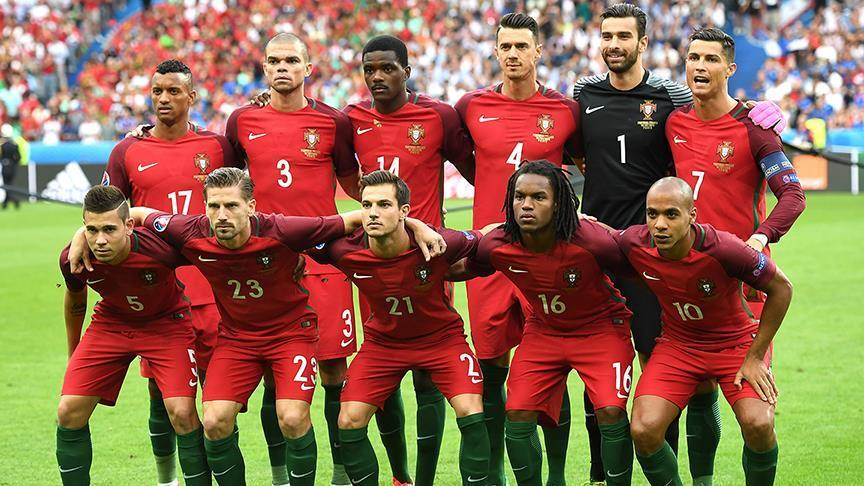

### 2.6 (G) England

`Although having the best soccer league in Europe, England did not seem to do that well at the national level. Let's figure out their options for the upcoming World Cup:`

In [47]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

               Squad  Overall  Potential
Nationality                             
England        3-4-3    82.64      87.18
England        4-4-2    82.64      87.27
England      4-3-1-2    82.27      86.73
England        4-3-3    82.73      87.36
England      4-2-3-1    82.36      87.36


`England should stick to 4-3-3 with their current squad and either 4-3-3 or 4-2-3-1 with their potential squad. Thus, I'll choose 4-3-3 and 4-2-3-1 respectively.`

In [48]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

-Overall-
Average rating: 82.7
Position       Player Overall Age              Club  Value  Wage
      GK      J. Hart      82  30   West Ham United   €14M €110K
     RWB    K. Walker      83  27   Manchester City   €24M €130K
      CB    G. Cahill      84  31           Chelsea   €21M €160K
      CB     M. Keane      81  24           Everton   €21M  €91K
     LWB      D. Rose      82  26 Tottenham Hotspur   €21M  €99K
      CM   A. Lallana      83  29         Liverpool   €25M €135K
      CM      E. Dier      82  23 Tottenham Hotspur   €25M  €85K
      CM J. Henderson      82  27         Liverpool €21.5M €115K
      RW   R. Barkley      81  23           Everton   €24M €105K
      ST      H. Kane      86  23 Tottenham Hotspur   €59M €165K
      LM      D. Alli      84  21 Tottenham Hotspur   €43M €115K


In [49]:
rating_4231_ENG_Potential, best_list_4231_ENG_Potential = get_best_squad_n(squad_4231_strict, 'England', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_ENG_Potential))
print(best_list_4231_ENG_Potential)

-Potential-
Average rating: 87.4
Position                Player Potential Age              Club  Value  Wage
      GK            J. Butland        87  24        Stoke City   €18M  €50K
     RWB A. Oxlade-Chamberlain        85  23         Liverpool   €20M €105K
      CB              M. Keane        87  24           Everton   €21M  €91K
      CB             J. Stones        85  23   Manchester City €14.5M €105K
      LB               L. Shaw        84  21 Manchester United   €14M  €91K
      CM              A. Gomes        90  16 Manchester United  €975K   €9K
      CM               E. Dier        87  23 Tottenham Hotspur   €25M  €85K
      RM           M. Rashford        89  19 Manchester United   €22M  €74K
     CAM            M. Edwards        87  18 Tottenham Hotspur  €1.2M  €11K
      LM               D. Alli        90  21 Tottenham Hotspur   €43M €115K
      ST               H. Kane        90  23 Tottenham Hotspur   €59M €165K


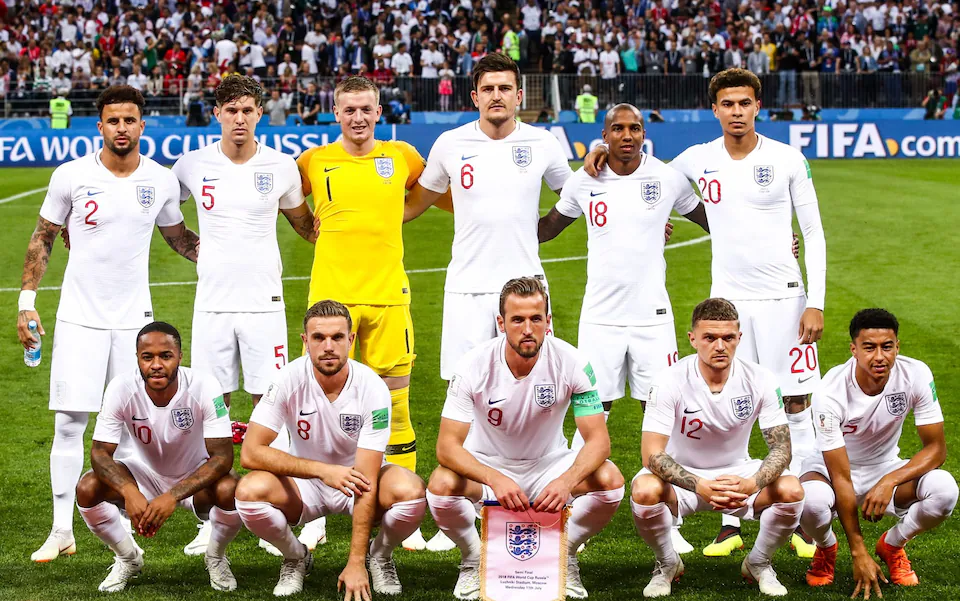

### 2.6 (H) Uruguay

`Uruguay has the 2 best strikers in Europe: Suarez & Cavani. Can they perform this time?`

In [50]:
Uruguay = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Uruguay'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Uruguay.set_index('Nationality', inplace = True)
Uruguay[['Overall', 'Potential']] = Uruguay[['Overall', 'Potential']].astype(float)

print (Uruguay)

               Squad  Overall  Potential
Nationality                             
Uruguay        3-4-3    80.64      84.91
Uruguay        4-4-2    81.09      85.27
Uruguay      4-3-1-2    81.09      84.73
Uruguay        4-3-3    80.18      84.91
Uruguay      4-2-3-1    79.82      84.27


`Fantastic, Uruguay does best with a 4-3-1-2 for current rating and 4-4-2 for future rating.`

In [51]:
rating_4312_URG_Overall, best_list_4312_URG_Overall = get_best_squad_n(squad_4312_strict, 'Uruguay', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_URG_Overall))
print(best_list_4312_URG_Overall)

-Overall-
Average rating: 81.1
Position        Player Overall Age                Club  Value  Wage
      GK    F. Muslera      82  31      Galatasaray SK €13.5M  €57K
      RB    M. Cáceres      77  30       Hellas Verona  €6.5M  €28K
      CB      D. Godín      88  31     Atlético Madrid   €40M €125K
      CB    J. Giménez      83  22     Atlético Madrid €28.5M  €53K
      LB      F. Ricca      74  22           Málaga CF    €7M  €18K
     CDM     M. Vecino      78  25               Inter   €13M  €59K
     CDM      M. Lemos      77  21       UD Las Palmas €10.5M  €17K
      CM S. Cristóforo      76  23          Fiorentina  €8.5M  €48K
      CF    N. Lodeiro      78  28 Seattle Sounders FC €10.5M  €11K
      ST     L. Suárez      92  30        FC Barcelona   €97M €510K
      ST     E. Cavani      87  30 Paris Saint-Germain €48.5M €160K


In [52]:
rating_442_URG_Potential, best_list_442_URG_Potential = get_best_squad_n(squad_442_strict, 'Uruguay', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_URG_Potential))
print(best_list_442_URG_Potential)

-Potential-
Average rating: 85.3
Position      Player Potential Age                      Club  Value  Wage
      GK  F. Muslera        82  31            Galatasaray SK €13.5M  €57K
      RB C. González        82  20          Sevilla Atlético  €1.8M   €3K
      CB    D. Godín        88  31           Atlético Madrid   €40M €125K
      CB  J. Giménez        87  22           Atlético Madrid €28.5M  €53K
     LWB M. Saracchi        85  19               River Plate  €3.4M   €7K
      RM F. Valverde        85  18 RC Deportivo de La Coruña  €3.6M  €44K
      CM   N. Nández        85  21              Boca Juniors  €3.5M  €11K
      CM L. Torreira        83  21                 Sampdoria   €10M  €26K
      LM   D. Laxalt        82  24                     Genoa €13.5M  €30K
      ST   L. Suárez        92  30              FC Barcelona   €97M €510K
      ST   E. Cavani        87  30       Paris Saint-Germain €48.5M €160K


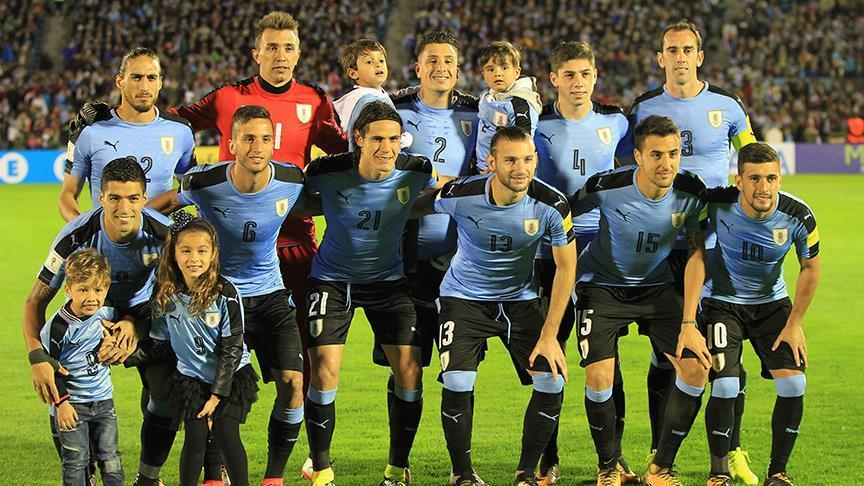

### 2.6 (I) Croatia

`Well, I'm a big fan of Modric and Rakitic. Needless to say about their winning habits?`

In [53]:
Croatia = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Croatia'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Croatia.set_index('Nationality', inplace = True)
Croatia[['Overall', 'Potential']] = Croatia[['Overall', 'Potential']].astype(float)

print (Croatia)

               Squad  Overall  Potential
Nationality                             
Croatia        3-4-3    80.55      83.00
Croatia        4-4-2    80.82      83.00
Croatia      4-3-1-2    81.27      83.64
Croatia        4-3-3    81.64      83.91
Croatia      4-2-3-1    81.64      83.64


`Dope, Croatia is superior with a 4-2-3-1 using current form and 4-3-3 using potential form.`

In [54]:
rating_4231_CRO_Overall, best_list_4231_CRO_Overall = get_best_squad_n(squad_4231_strict, 'Croatia', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_CRO_Overall))
print(best_list_4231_CRO_Overall)

-Overall-
Average rating: 81.6
Position       Player Overall Age             Club  Value  Wage
      GK   D. Subašić      85  32        AS Monaco   €22M  €46K
      RB      D. Srna      81  35 Shakhtar Donetsk  €3.8M   €1K
      CB   V. Ćorluka      82  31 Lokomotiv Moscow   €15M  €54K
      CB    D. Lovren      81  27        Liverpool €17.5M €110K
      LB   I. Strinić      75  29        Sampdoria    €5M  €31K
     CDM    L. Modrić      89  31   Real Madrid CF   €57M €340K
      CM   I. Rakitić      87  29     FC Barcelona €48.5M €275K
      RM   J. Brekalo      70  19    VfB Stuttgart  €3.1M  €21K
     CAM   I. Perišić      84  28            Inter €31.5M €110K
      LM M. Mandžukić      83  31         Juventus €23.5M €135K
      ST   N. Kalinić      81  29            Milan   €18M  €84K


In [55]:
rating_433_CRO_Potential, best_list_433_CRO_Potential = get_best_squad_n(squad_433_strict, 'Croatia', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_CRO_Potential))
print(best_list_433_CRO_Potential)

-Potential-
Average rating: 83.9
Position     Player Potential Age                Club  Value  Wage
      GK D. Subašić        85  32           AS Monaco   €22M  €46K
      RB  T. Jedvaj        84  21 Bayer 04 Leverkusen   €10M  €36K
      CB  D. Lovren        83  27           Liverpool €17.5M €110K
      CB V. Ćorluka        82  31    Lokomotiv Moscow   €15M  €54K
      LB   A. Milić        76  23         KV Oostende  €2.7M   €9K
     CDM  L. Modrić        89  31      Real Madrid CF   €57M €340K
     CDM M. Kovačić        88  23      Real Madrid CF   €30M €150K
      CM I. Rakitić        87  29        FC Barcelona €48.5M €275K
      RM J. Brekalo        82  19       VfB Stuttgart  €3.1M  €21K
      ST N. Kalinić        81  29               Milan   €18M  €84K
      LW   M. Pjaca        86  22            Juventus €12.5M  €89K


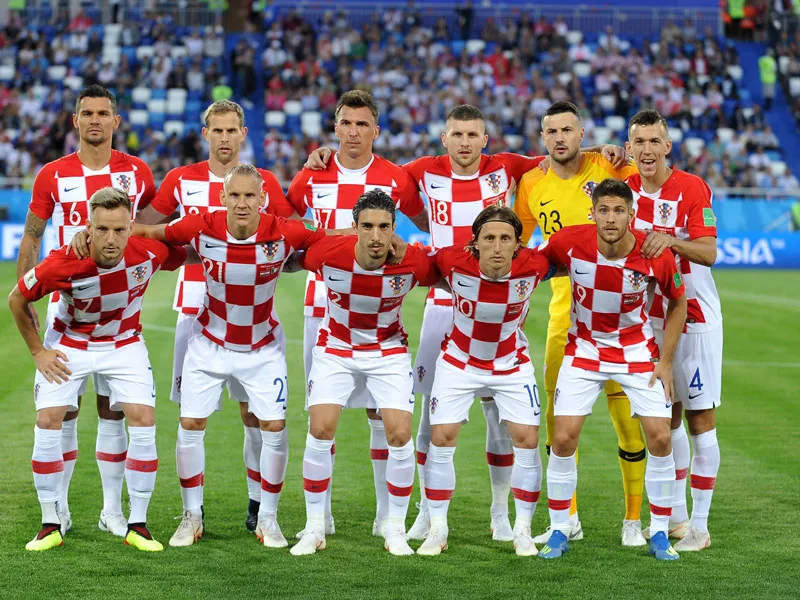

### 2.6 (J) Argentina

`Lionel Messi is still waiting for the only trophy he hasn't gotten yet in his career. Can he carry Argentina to the top after going short in the final 4 years ago?`

In [56]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Argentina.set_index('Nationality', inplace = True)
Argentina[['Overall', 'Potential']] = Argentina[['Overall', 'Potential']].astype(float)

print (Argentina)

               Squad  Overall  Potential
Nationality                             
Argentina      3-4-3    84.27      87.36
Argentina      4-4-2    83.45      87.27
Argentina    4-3-1-2    83.55      86.73
Argentina      4-3-3    84.27      87.36
Argentina    4-2-3-1    84.00      87.09


`Both 3-4-3 and 4-3-3 fare very well for the current and potential ratings of Argentine players. For the sake of diversity, I'll choose 3-4-3 for their current squad and 4-3-3 for their future squad.`

In [57]:
rating_343_ARG_Overall, best_list_343_ARG_Overall = get_best_squad_n(squad_343_strict, 'Argentina', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_ARG_Overall))
print(best_list_343_ARG_Overall)

-Overall-
Average rating: 84.3
Position       Player Overall Age                Club  Value  Wage
      GK     G. Rulli      83  25       Real Sociedad €25.5M  €28K
      CB  N. Otamendi      83  29     Manchester City   €20M €140K
      CB M. Musacchio      83  26               Milan   €27M €105K
      CB     E. Garay      83  30         Valencia CF   €19M  €40K
      RB  P. Zabaleta      79  32     West Ham United    €7M  €99K
      CM    E. Banega      83  29          Sevilla FC €25.5M  €27K
      CM    L. Biglia      83  31               Milan €17.5M €105K
      LB      M. Rojo      82  27   Manchester United   €21M €130K
      RW     L. Messi      93  30        FC Barcelona  €105M €565K
      ST   G. Higuaín      90  29            Juventus   €77M €275K
      LW  A. Di María      85  29 Paris Saint-Germain €37.5M €145K


In [58]:
rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

-Potential-
Average rating: 87.4
Position       Player Potential Age                 Club  Value  Wage
      GK     G. Rulli        89  25        Real Sociedad €25.5M  €28K
      RB     J. Figal        82  23        Independiente    €8M  €16K
      CB M. Musacchio        86  26                Milan   €27M €105K
      CB   E. Mammana        86  21 Zenit St. Petersburg   €10M  €36K
      LB      M. Rojo        83  27    Manchester United   €21M €130K
      CM     E. Barco        90  18        Independiente  €6.5M   €8K
      CM  G. Lo Celso        86  21  Paris Saint-Germain   €10M  €48K
     CDM S. Ascacibar        86  20        VfB Stuttgart    €7M  €17K
      RW     L. Messi        93  30         FC Barcelona  €105M €565K
      ST    P. Dybala        93  23             Juventus   €79M €215K
      LM   M. Lanzini        87  24      West Ham United €24.5M  €95K


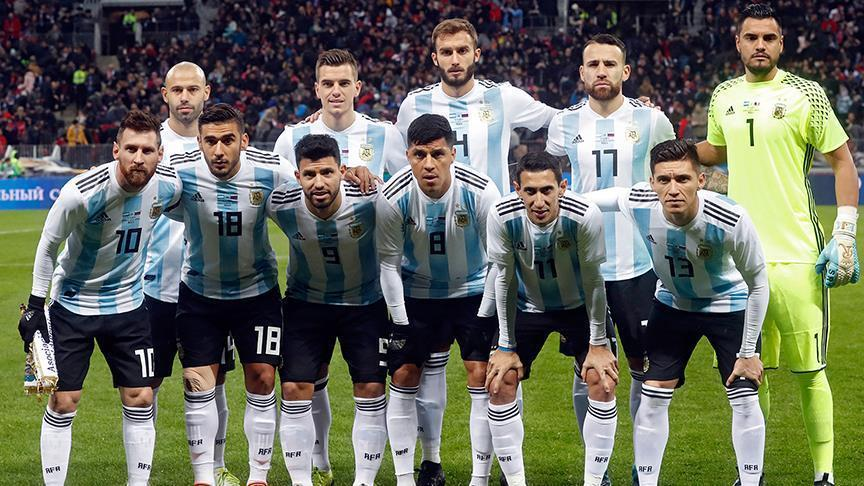

## 2.7 Final 10 Team Comparison

`Ok, let's make some comparison between these 10 line-ups with the current rating of players for these strongest contenders for World Cup 2018.`

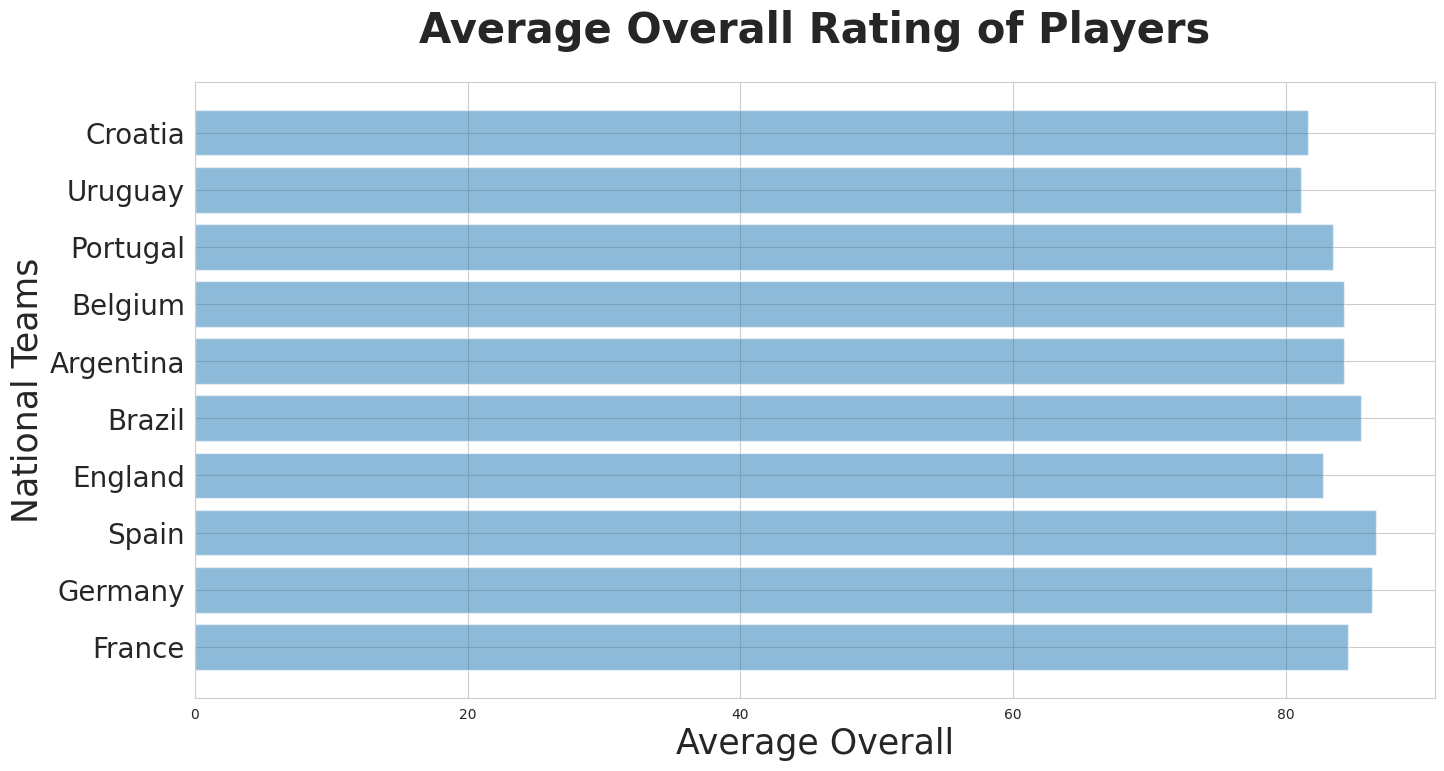

In [59]:
teams = ('France', 'Germany', 'Spain', 'England', 'Brazil', 'Argentina', 'Belgium', 'Portugal', 'Uruguay', 'Croatia')
index = np.arange(len(teams))
average_overall = [84.6, 86.3, 86.6, 82.7, 85.5, 84.3, 84.3, 83.5, 81.1, 81.6]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)

plt.show()

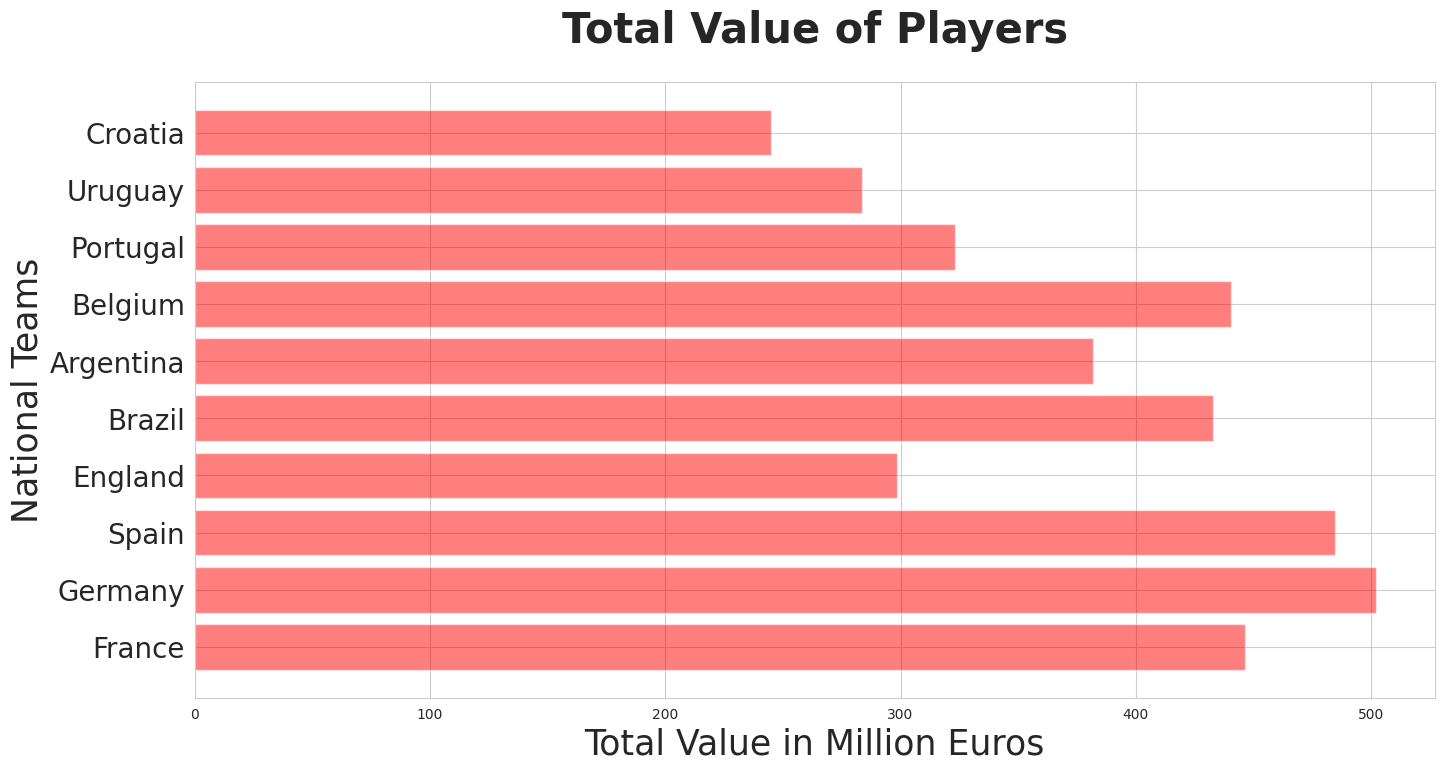

In [60]:
total_value = [446.5, 502, 484.5, 298.5, 433, 382, 440.5, 323, 283.5, 244.9]

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)

plt.show()

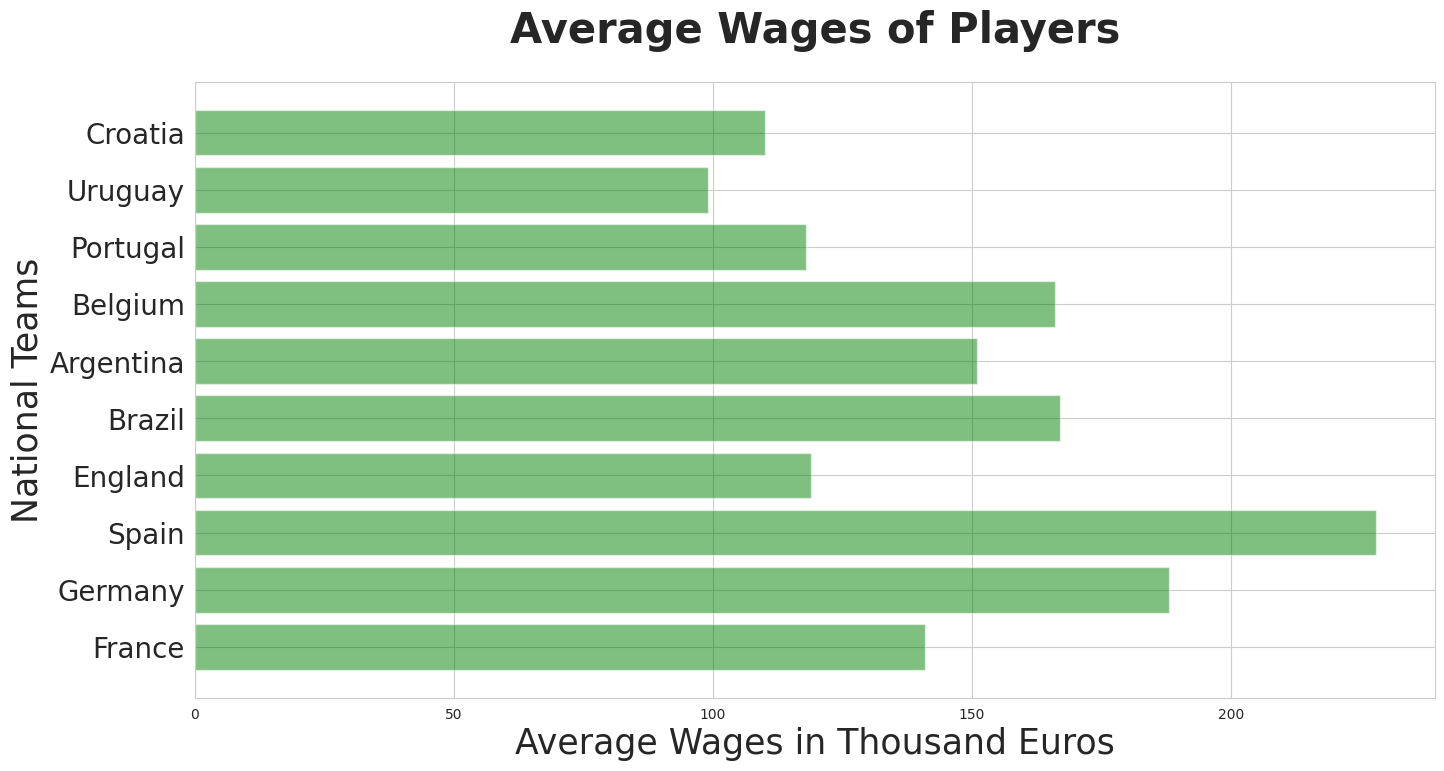

In [61]:
average_wage = [141, 188, 228, 119, 167, 151, 166, 118, 99, 110]

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)

plt.show()

# Concusion

`So based purely on the FIFA 18 Data:`

`> Spain has the highest average overall rating, followed by Germany and Brazil.`

`> Germany has the highest total value, followed by Spain and France.`

`> Spain has the highest average wage, followed by Germany and Brazil.`

`My bet is for a Spain vs Germany in the final, and Brazil vs France for the 3rd place. Your turn?`